In [53]:
# import line
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [54]:
# Configuration
batch_size = 64
sample_size = 100
epochs = 100

In [55]:
transform = transforms.ToTensor()
dataset = datasets.MNIST(root="./", train=True, download=False, transform=transform)
dataloader = DataLoader(dataset, batch_size=64, drop_last=True)

In [56]:
images, labels = next(iter(dataloader))
print(images.shape)
print(labels)

torch.Size([64, 1, 28, 28])
tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0])


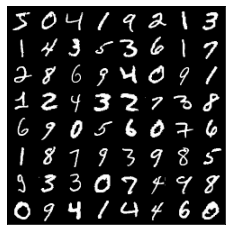

In [57]:
def save_image_grid(epoch: int, images: torch.Tensor, ncol: int):
    image_grid = make_grid(images, ncol) # 그리드 이미지 만들기
    image_grid = image_grid.permute(1, 2, 0) # 채널을 마지막 차원으로 이동
    image_grid = image_grid.cpu().numpy()
    
    plt.imshow(image_grid)
    plt.xticks([])
    plt.yticks([])
    plt.savefig(f'generated_{epoch:03d}.png')
    plt.show()

save_image_grid(0, images, 8) # 8x8 이미지 그리드 생성

In [58]:
class Generator(nn.Sequential):
    def __init__(self, sample_size: int):
        super().__init__(
            nn.Linear(sample_size, 128),
            nn.LeakyReLU(0.01),
            nn.Linear(128, 784),
            nn.Sigmoid())
        
        self.sample_size = sample_size
    
    def forward(self, batch_size: int):
        z = torch.randn(batch_size, self.sample_size)
        output = super().forward(z)
        generated_images = output.reshape(batch_size, 1, 28, 28)
        return generated_images

In [59]:
class Discriminator(nn.Sequential):
    def __init__(self):
        super().__init__(
            nn.Linear(784, 128),
            nn.LeakyReLU(0.01),
            nn.Linear(128, 1))
    
    def forward(self, images: torch.Tensor, targets: torch.Tensor):
        pred = super().forward(images.reshape(-1, 784))
        loss = F.binary_cross_entropy_with_logits(pred, targets)
        return loss

In [60]:
real_targets = torch.ones(64, 1)
fake_targets = torch.zeros(64, 1)

In [61]:
generator = Generator(sample_size)
discriminator = Discriminator()

In [62]:
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=1e-4)
g_optimizer = torch.optim.Adam(generator.parameters(), lr=1e-4)

# Training

100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 97.57it/s]


epoch : 1, d_loss : 0.54700, g_loss : 1.23554


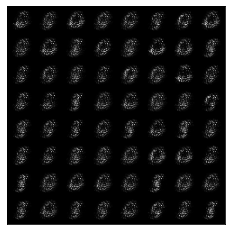

100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 97.59it/s]


epoch : 2, d_loss : 0.44107, g_loss : 1.61461


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 95.58it/s]


epoch : 3, d_loss : 0.75504, g_loss : 1.48882


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 95.90it/s]


epoch : 4, d_loss : 0.65720, g_loss : 1.67097


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 94.98it/s]


epoch : 5, d_loss : 0.48284, g_loss : 1.92964


100%|█████████████████████████████████████████| 937/937 [00:10<00:00, 93.60it/s]


epoch : 6, d_loss : 0.48899, g_loss : 1.93403


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 95.39it/s]


epoch : 7, d_loss : 0.48101, g_loss : 2.01525


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 95.53it/s]


epoch : 8, d_loss : 0.40258, g_loss : 2.21231


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 97.91it/s]


epoch : 9, d_loss : 0.48809, g_loss : 2.08848


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 95.99it/s]


epoch : 10, d_loss : 0.47800, g_loss : 1.99053


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 97.52it/s]


epoch : 11, d_loss : 0.46163, g_loss : 2.10952


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 98.42it/s]


epoch : 12, d_loss : 0.55195, g_loss : 2.06517


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 99.60it/s]


epoch : 13, d_loss : 0.52593, g_loss : 2.00092


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 96.79it/s]


epoch : 14, d_loss : 0.50717, g_loss : 2.00861


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 95.15it/s]


epoch : 15, d_loss : 0.45800, g_loss : 2.15820


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 96.01it/s]


epoch : 16, d_loss : 0.41521, g_loss : 2.30919


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 95.21it/s]


epoch : 17, d_loss : 0.39985, g_loss : 2.37419


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 95.94it/s]


epoch : 18, d_loss : 0.36560, g_loss : 2.47411


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 97.06it/s]


epoch : 19, d_loss : 0.42538, g_loss : 2.39973


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 97.37it/s]


epoch : 20, d_loss : 0.38062, g_loss : 2.60837


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 97.34it/s]

epoch : 21, d_loss : 0.44334, g_loss : 2.44727


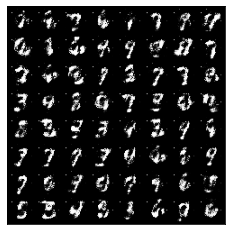

100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 97.74it/s]


epoch : 22, d_loss : 0.43421, g_loss : 2.48204


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 94.15it/s]


epoch : 23, d_loss : 0.48628, g_loss : 2.32790


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 94.57it/s]


epoch : 24, d_loss : 0.46643, g_loss : 2.32191


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 96.15it/s]


epoch : 25, d_loss : 0.41588, g_loss : 2.49000


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 98.84it/s]


epoch : 26, d_loss : 0.45457, g_loss : 2.35029


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 97.87it/s]


epoch : 27, d_loss : 0.48186, g_loss : 2.29573


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 97.89it/s]


epoch : 28, d_loss : 0.46118, g_loss : 2.36671


100%|████████████████████████████████████████| 937/937 [00:09<00:00, 100.01it/s]


epoch : 29, d_loss : 0.46985, g_loss : 2.33304


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 97.41it/s]


epoch : 30, d_loss : 0.50370, g_loss : 2.31607


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 98.47it/s]


epoch : 31, d_loss : 0.51616, g_loss : 2.34771


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 99.26it/s]


epoch : 32, d_loss : 0.52880, g_loss : 2.30980


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 98.55it/s]


epoch : 33, d_loss : 0.51547, g_loss : 2.40578


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 98.11it/s]


epoch : 34, d_loss : 0.54361, g_loss : 2.28146


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 99.49it/s]


epoch : 35, d_loss : 0.53151, g_loss : 2.25519


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 97.85it/s]


epoch : 36, d_loss : 0.56819, g_loss : 2.23741


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 97.69it/s]


epoch : 37, d_loss : 0.57134, g_loss : 2.21420


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 97.02it/s]


epoch : 38, d_loss : 0.55532, g_loss : 2.26365


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 96.76it/s]


epoch : 39, d_loss : 0.54844, g_loss : 2.32282


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 96.34it/s]


epoch : 40, d_loss : 0.54492, g_loss : 2.36305


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 98.54it/s]

epoch : 41, d_loss : 0.53124, g_loss : 2.34566


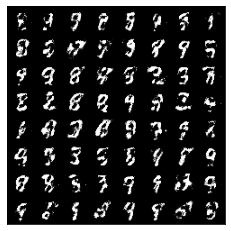

100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 95.27it/s]


epoch : 42, d_loss : 0.51837, g_loss : 2.38762


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 97.60it/s]


epoch : 43, d_loss : 0.52424, g_loss : 2.37733


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 96.95it/s]


epoch : 44, d_loss : 0.54541, g_loss : 2.37001


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 97.75it/s]


epoch : 45, d_loss : 0.55851, g_loss : 2.32862


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 98.11it/s]


epoch : 46, d_loss : 0.55050, g_loss : 2.33280


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 98.68it/s]


epoch : 47, d_loss : 0.54624, g_loss : 2.32842


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 98.30it/s]


epoch : 48, d_loss : 0.54008, g_loss : 2.33054


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 97.84it/s]


epoch : 49, d_loss : 0.54541, g_loss : 2.34352


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 98.07it/s]


epoch : 50, d_loss : 0.52772, g_loss : 2.35376


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 96.08it/s]


epoch : 51, d_loss : 0.53773, g_loss : 2.33282


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 97.18it/s]


epoch : 52, d_loss : 0.55472, g_loss : 2.33953


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 97.28it/s]


epoch : 53, d_loss : 0.56222, g_loss : 2.33329


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 95.24it/s]


epoch : 54, d_loss : 0.55561, g_loss : 2.32247


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 98.78it/s]


epoch : 55, d_loss : 0.55081, g_loss : 2.33304


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 98.13it/s]


epoch : 56, d_loss : 0.55721, g_loss : 2.32309


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 98.62it/s]


epoch : 57, d_loss : 0.60774, g_loss : 2.28656


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 94.20it/s]


epoch : 58, d_loss : 0.84609, g_loss : 1.97658


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 94.15it/s]


epoch : 59, d_loss : 0.43086, g_loss : 2.73564


100%|█████████████████████████████████████████| 937/937 [00:10<00:00, 92.95it/s]


epoch : 60, d_loss : 0.58831, g_loss : 2.30971


100%|█████████████████████████████████████████| 937/937 [00:10<00:00, 93.58it/s]


epoch : 61, d_loss : 1.25343, g_loss : 1.76203


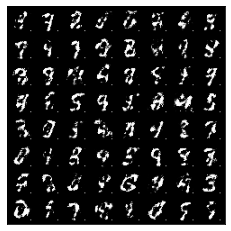

100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 98.40it/s]


epoch : 62, d_loss : 0.79742, g_loss : 2.00523


100%|█████████████████████████████████████████| 937/937 [00:10<00:00, 93.64it/s]


epoch : 63, d_loss : 0.40734, g_loss : 2.85441


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 93.75it/s]


epoch : 64, d_loss : 0.87869, g_loss : 2.11457


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 93.93it/s]


epoch : 65, d_loss : 0.62548, g_loss : 2.28381


100%|█████████████████████████████████████████| 937/937 [00:10<00:00, 93.34it/s]


epoch : 66, d_loss : 0.53084, g_loss : 2.54008


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 94.95it/s]


epoch : 67, d_loss : 0.58808, g_loss : 2.27965


100%|█████████████████████████████████████████| 937/937 [00:10<00:00, 92.38it/s]


epoch : 68, d_loss : 0.59730, g_loss : 2.31298


100%|█████████████████████████████████████████| 937/937 [00:10<00:00, 89.30it/s]


epoch : 69, d_loss : 1.51556, g_loss : 1.46309


100%|█████████████████████████████████████████| 937/937 [00:10<00:00, 91.34it/s]


epoch : 70, d_loss : 0.67841, g_loss : 2.26147


100%|█████████████████████████████████████████| 937/937 [00:10<00:00, 92.44it/s]


epoch : 71, d_loss : 0.47615, g_loss : 2.73817


100%|█████████████████████████████████████████| 937/937 [00:10<00:00, 92.27it/s]


epoch : 72, d_loss : 0.66192, g_loss : 2.19350


100%|█████████████████████████████████████████| 937/937 [00:10<00:00, 91.45it/s]


epoch : 73, d_loss : 0.63273, g_loss : 2.25435


100%|█████████████████████████████████████████| 937/937 [00:10<00:00, 90.30it/s]


epoch : 74, d_loss : 0.65808, g_loss : 2.18665


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 94.55it/s]


epoch : 75, d_loss : 0.65619, g_loss : 2.16957


100%|█████████████████████████████████████████| 937/937 [00:10<00:00, 92.72it/s]


epoch : 76, d_loss : 0.65890, g_loss : 2.13912


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 94.01it/s]


epoch : 77, d_loss : 0.66697, g_loss : 2.14315


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 93.76it/s]


epoch : 78, d_loss : 0.67965, g_loss : 2.13233


100%|█████████████████████████████████████████| 937/937 [00:10<00:00, 93.39it/s]


epoch : 79, d_loss : 0.67635, g_loss : 2.11916


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 96.72it/s]


epoch : 80, d_loss : 0.67116, g_loss : 2.13258


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 94.30it/s]


epoch : 81, d_loss : 1.18107, g_loss : 1.83946


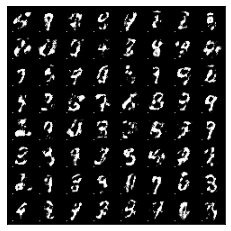

100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 96.87it/s]


epoch : 82, d_loss : 3.40757, g_loss : 0.61532


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 96.02it/s]


epoch : 83, d_loss : 1.07631, g_loss : 1.82555


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 97.27it/s]


epoch : 84, d_loss : 0.80639, g_loss : 2.07168


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 97.66it/s]


epoch : 85, d_loss : 0.51780, g_loss : 2.48656


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 94.14it/s]


epoch : 86, d_loss : 1.95610, g_loss : 1.16423


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 95.03it/s]


epoch : 87, d_loss : 0.99954, g_loss : 1.67415


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 94.59it/s]


epoch : 88, d_loss : 0.61563, g_loss : 2.20383


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 95.43it/s]


epoch : 89, d_loss : 0.67737, g_loss : 2.14829


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 96.95it/s]


epoch : 90, d_loss : 0.72360, g_loss : 1.97979


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 96.66it/s]


epoch : 91, d_loss : 0.71967, g_loss : 1.99045


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 95.72it/s]


epoch : 92, d_loss : 1.04697, g_loss : 1.75434


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 97.52it/s]


epoch : 93, d_loss : 0.99751, g_loss : 1.59646


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 96.94it/s]


epoch : 94, d_loss : 0.55673, g_loss : 2.24980


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 96.59it/s]


epoch : 95, d_loss : 0.72247, g_loss : 1.95044


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 97.08it/s]


epoch : 96, d_loss : 0.71008, g_loss : 1.96599


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 97.09it/s]


epoch : 97, d_loss : 0.70038, g_loss : 1.96119


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 96.75it/s]


epoch : 98, d_loss : 0.92843, g_loss : 1.68441


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 94.49it/s]


epoch : 99, d_loss : 0.65646, g_loss : 2.02783


100%|█████████████████████████████████████████| 937/937 [00:09<00:00, 95.51it/s]

epoch : 100, d_loss : 0.72596, g_loss : 1.92588


In [64]:
for epoch in range(epochs):
    d_losses = []
    g_losses = []
    
    for images, labels in tqdm(dataloader):
        # Discriminator Training
        discriminator.train()
        d_loss = discriminator(images, real_targets) # 진짜 이미지-진짜 레이블
        
        generator.eval()
        with torch.no_grad():
            generated_images = generator(batch_size)
            
        d_loss += discriminator(generated_images, fake_targets)  # 가짜 이미지-가짜 레이블
        
        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()
        
        # Generator Training
        generator.train()
        generated_images = generator(batch_size)
        
        discriminator.eval()
        g_loss = discriminator(generated_images, real_targets)
        
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()
        
        d_losses.append(d_loss.item())
        g_losses.append(g_loss.item())
    
    print(f'epoch : {epoch+1}, d_loss : {np.mean(d_losses):.5f}, g_loss : {np.mean(g_losses):.5f}')
    if (epoch==0 and (epoch+1)%20==0):
        save_image_grid(epoch, generator(batch_size), ncol=8)

# Classifier training

In [71]:
device = torch.device("cuda")

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))
model.to(device)

loss_fn = nn.CrossEntropyLoss() # softmax 함수 적용됨.
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [75]:
epochs = 50
losses = []
for epoch in range(epochs):
    model.train()
    for x, y in dataloader:
        x = x.view(-1, 28*28).to(device)
        y = y.to(device)
        optimizer.zero_grad()
        output = model(x)
        loss = loss_fn(output, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    print(f"Epoch : {epoch+1}, loss : {np.mean(losses):.5f}")

Epochs : 1, train_loss : 0.48195
Epochs : 2, train_loss : 0.33959
Epochs : 3, train_loss : 0.27274
Epochs : 4, train_loss : 0.23121
Epochs : 5, train_loss : 0.20217
Epochs : 6, train_loss : 0.18034
Epochs : 7, train_loss : 0.16314
Epochs : 8, train_loss : 0.14910
Epochs : 9, train_loss : 0.13735
Epochs : 10, train_loss : 0.12732
Epochs : 11, train_loss : 0.11862
Epochs : 12, train_loss : 0.11099
Epochs : 13, train_loss : 0.10424
Epochs : 14, train_loss : 0.09821
Epochs : 15, train_loss : 0.09278
Epochs : 16, train_loss : 0.08787
Epochs : 17, train_loss : 0.08341
Epochs : 18, train_loss : 0.07934
Epochs : 19, train_loss : 0.07561
Epochs : 20, train_loss : 0.07219
Epochs : 21, train_loss : 0.06906
Epochs : 22, train_loss : 0.06616
Epochs : 23, train_loss : 0.06349
Epochs : 24, train_loss : 0.06100
Epochs : 25, train_loss : 0.05870
Epochs : 26, train_loss : 0.05656
Epochs : 27, train_loss : 0.05456
Epochs : 28, train_loss : 0.05270
Epochs : 29, train_loss : 0.05096
Epochs : 30, train_loss

# Result

In [94]:
def show_image(x, i):
    image = x[i][0]
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.show()

0 ~ 9 숫자 입력 : 8


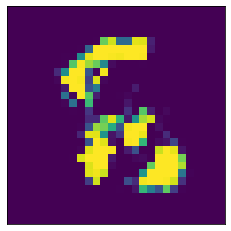

In [108]:
n = int(input("0 ~ 9 숫자 입력 : "))

with torch.no_grad():
    generator.eval()
    x = generator(batch_size)
    x_flat = x.view(-1, 28*28).to(device)
    
    output = model(x_flat) # (batch_size,10)
    output = np.argmax(output.cpu().numpy(), axis=1) # (batch_size,)
    
    for i in range(batch_size):
        if (n==output[i]):
            show_image(x, i)
            break